In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Grab and process the raw data.
data_path = ("/Users/Mahfuz-Tamim/Thinkful/Supervised Learning/sentiment labelled sentences/yelp_labelled.txt")
yelp_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
yelp_raw.columns = ['sentence', 'score']

In [5]:
yelp_raw['score'] = (yelp_raw['score'] == 1)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [ ]:
yelp_raw2 = yelp_raw.copy() # for classifier 2
yelp_raw3 = yelp_raw.copy() # for classifier 3
yelp_raw4 = yelp_raw.copy() # for classifier 4
yelp_raw5 = yelp_raw.copy() # for classifier 5

In [3]:
keywords = ['love', 'good', 'great',  'right', 'beautiful','amazing','happy','like','delight','positive']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

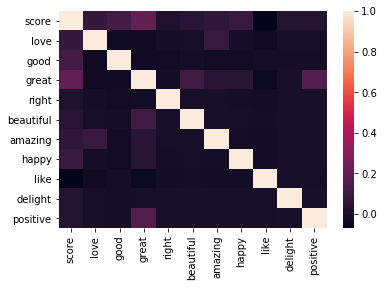

In [6]:
sns.heatmap(yelp_raw.corr())

In [7]:
data = yelp_raw[keywords]
target = yelp_raw['score']

### Classifier Version 1 - the original

In [8]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 412


In [9]:
# # Build your confusion matrix and calculate sensitivity and specificity here.
# def my_confusion_matrix (target,y_pred):
#     # target is a column of a df (aka a series) that has booleans 
#     # informing the true nature of a data entry. y_pred has a series 
#     # of booleans depending on the prediction of the model
#     s1 = pd.Series(target, name='s1')
#     s2 = pd.Series(y_pred, name='s2')
#     df = pd.concat([s1, s2], axis=1) #concatinate the two series along columns
#     df['confusion'] = np.nan
#     for i in range(df.shape[0]):
#         if (df['s1'].iloc[i] == True and df['s2'].iloc[i] == True):
#             df['confusion'].iloc[i] = 'a'
#         elif (df['s1'].iloc[i] == True and df['s2'].iloc[i] == False):
#             df['confusion'].iloc[i] = 'b'
#         elif (df['s1'].iloc[i] == False and df['s2'].iloc[i] == True):
#             df['confusion'].iloc[i] = 'c'
#         else:
#             df['confusion'].iloc[i] = 'd'
#     a = (df.confusion == 'a').sum()
#     b = (df.confusion == 'b').sum()
#     c = (df.confusion == 'c').sum()
#     d = (df.confusion == 'd').sum()
#     df1 = pd.DataFrame(np.array([[a,b],[c,d]]),columns=['neg','pos'])
#     sens = '{:.2%}'.format(d/(c+d))
#     spec = '{:.2%}'.format(a/(a+b))
#     print(f'Sensitivity = {sens} and Specificity = {spec}')
#     print(df1)

# my_confusion_matrix(target,y_pred)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[479,  21],
       [391, 109]])

In [11]:
# Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.6
Testing on Sample: 0.588


In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.59, 0.59, 0.57, 0.59, 0.55, 0.57, 0.61, 0.57, 0.55, 0.64])

### Classifier Version 2 - Add more positive words

In [37]:
keywords = ['awesome',
               'love', 
               'good', 
               'great',  
               'right', 
               'beautiful',
               'amazing',
               'happy',
               'like',
               'delight',
               'positive', 
               'authentic']

In [38]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching. However, this means the first and last word of a sentence is ignored
    yelp_raw2[str(key)] = yelp_raw2.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

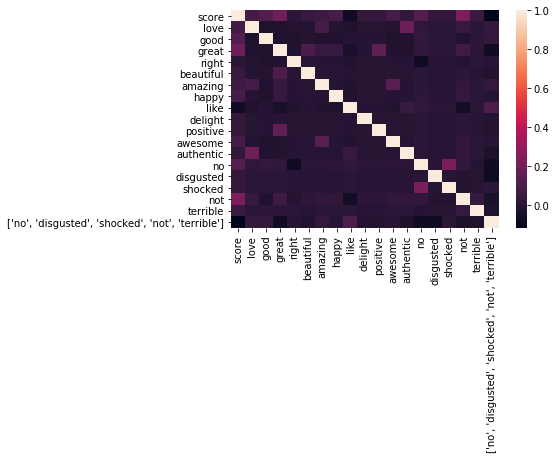

In [39]:
sns.heatmap(yelp_raw2.corr())

data = yelp_raw2[keywords]
target = yelp_raw2['score']

In [ ]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

In [ ]:
confusion_matrix(target, y_pred)

In [ ]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

In [ ]:
cross_val_score(bnb, data, target, cv=10)

### Classifier Version 2 - Add neg words?

In [37]:
keywords = ['awesome','love', 'good', 'great',  'right', 'beautiful',
            'amazing','happy','like','delight','positive', 'authentic']

In [38]:
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching. However, this means the first and last word of a sentence is ignored
    yelp_raw2[str(key)] = yelp_raw2.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

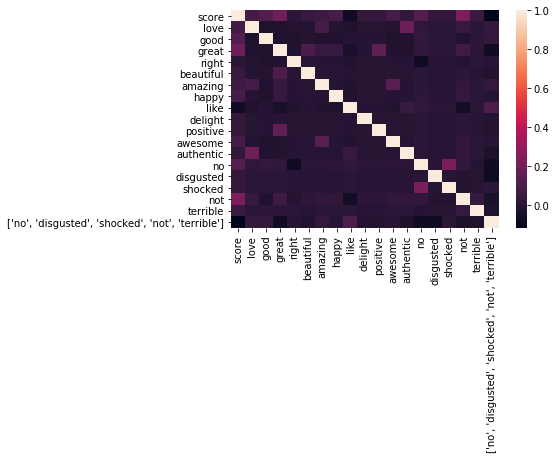

In [39]:
sns.heatmap(yelp_raw2.corr())

data = yelp_raw2[keywords]
target = yelp_raw2['score']

In [ ]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

In [ ]:
confusion_matrix(target, y_pred)

In [ ]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

In [ ]:
cross_val_score(bnb, data, target, cv=10)

### Classifier Version 3 - Add neg words?

In [ ]:
keywords = ['awesome','love', 'good', 'great',  'right', 'beautiful',
            'amazing','happy','like','delight','positive', 'authentic',
            'no', 'disgusted', 'shocked','not', 'terrible']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching. However, this means the first and last word of a sentence is ignored
    yelp_raw3[str(key)] = yelp_raw3.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [ ]:
sns.heatmap(yelp_raw3.corr())

In [ ]:
data = yelp_raw2[keywords]
target = yelp_raw2['score']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

confusion_matrix(target, y_pred)

In [ ]:
# Test your model with different holdout groups.

# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

cross_val_score(bnb, data, target, cv=10)

### Classifier Version 4 - Add neg words, flip booleans

In [25]:
poskeywords = ['awesome',
               'love', 
               'good', 
               'great',  
               'right', 
               'beautiful',
               'amazing',
               'happy',
               'like',
               'delight',
               'positive', 
               'authentic',
               'loved']

In [26]:
negkeywords = ['no', 
               'disgusted', 
               'shocked',
               'not', 
               'terrible']

In [27]:
for key in poskeywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw4[str(key)] = yelp_raw4.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [31]:
for key in negkeywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching. 
    yelp_raw4[str(key)] = yelp_raw4.sentence.str.contains(
        ' ' + str(key) + ' ',
       case=False
    )
    yelp_raw[str(key)]= ~yelp_raw[str(key)]
    

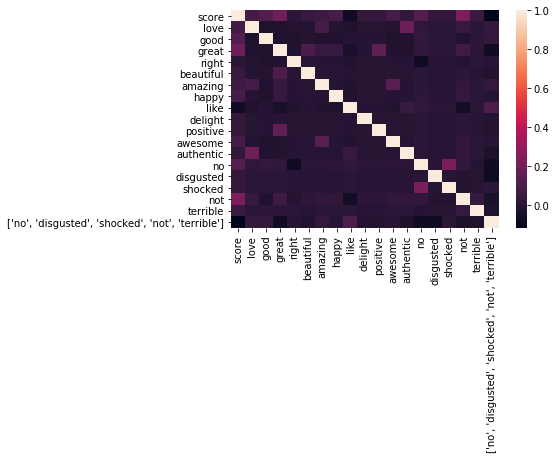

In [32]:
sns.heatmap(yelp_raw4.corr())

In [33]:
data = yelp_raw4[poskeywords + negkeywords]
target = yelp_raw4['score']

In [34]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 409


In [35]:
confusion_matrix(target, y_pred)

array([[122, 378],
       [ 31, 469]])

In [36]:
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.55
Testing on Sample: 0.591
